# Qiskit 설치 (colab에서는 새션이 새로 시작될 때, 코랩에서 제공하는 기본 패키지가 아니면, 새로 설치해야 함)!

In [2]:
from google.colab import output

!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]

output.clear()

## 텐서곱을 활용한 멀티큐빗 정의

In [5]:
from qiskit.quantum_info import Statevector, Operator

zero = Statevector([1,0])
one = Statevector([0,1])
zero.tensor(one).draw("latex")

<IPython.core.display.Latex object>

### Colab에서 기본적으로 정의된 상태벡터를 활용

In [6]:
zero = Statevector.from_label("0")
one = Statevector.from_label("1")
zero.tensor(one).draw("latex")

<IPython.core.display.Latex object>

### 아래 두 상태벡터들을 텐서곱:
1. $|+ \rangle = \left(\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}\right) $ \\
2. $|v \rangle = \left(\frac{1}{\sqrt{2}},  \frac{i}{\sqrt{2}}\right) $ \\

$|+\rangle \otimes |v\rangle = \left(\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}\right) \otimes \left(\frac{1}{\sqrt{2}},  \frac{i}{\sqrt{2}}\right) =
\left(\frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}}|1\rangle\right)\otimes
\left(\frac{1}{\sqrt{2}} |0\rangle + \frac{i}{\sqrt{2}}|1\rangle\right)
= \frac{1}{2}|00\rangle + \frac{i}{2}|01\rangle + \frac{1}{2}|10\rangle + \frac{i}{2}|11\rangle
$

In [17]:
from numpy import sqrt

plus = Statevector.from_label("+")
v = Statevector([1/sqrt(2), 1j/sqrt(2)])

psi=plus.tensor(v)
psi.draw("latex")

<IPython.core.display.Latex object>

## 멀티 큐빗에 연산하기
두 개의 단일 큐빗 연산자 $U$와 $V$가 있다. 멀티큐빗 $|\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle $ 로 주어질 때, \\
$(U\otimes V)|\Psi\rangle = (U\otimes V)\left(|\psi_1\rangle \otimes |\psi_2\rangle\right) = U|\psi_1\rangle \otimes V|\psi_2\rangle $

### 예를 들어, 첫번째 큐빗에는 $I=\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$ 을 연산하고, 두번째 큐빗에는 $X=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$ 을 연산하는 $XI\equiv X\otimes I$ 를 아래와 같이 정의한다.

In [31]:
X = Operator([[0, 1], [1, 0]])

I = Operator([[1, 0], [0, 1]])

XI=X.tensor(I)
XI

Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


 1. $|q_1 \rangle = \frac{1}{\sqrt{3}}|0\rangle + \frac{2}{\sqrt{3}}|1\rangle $
 2. $|q_2 \rangle = |0\rangle $

 일 때, $|\psi\rangle = |q_2\rangle \otimes |q_1\rangle = \frac{1}{\sqrt{3}}|00\rangle
 + \frac{2}{\sqrt{3}}|01\rangle $ 인 경우,  

In [37]:
q1 = Statevector([1/sqrt(3) , sqrt(2)/sqrt(3)])
q2 = Statevector([1,0 ])

psi=q2.tensor(q1)
psi.draw("latex")

<IPython.core.display.Latex object>

$(X\otimes I)|\psi\rangle = X|q_2\rangle \otimes I|q_1\rangle = |1\rangle \otimes \left(\frac{1}{\sqrt{3}}|0\rangle + \frac{2}{\sqrt{3}}|1\rangle \right) = \frac{1}{\sqrt{3}}|10\rangle + \frac{2}{\sqrt{3}}|11\rangle$

In [38]:
psi.evolve(XI).draw("latex")

<IPython.core.display.Latex object>

## 위를 양자회로 (QuantumCircuit) 를 활용해 구현하면

<ipython-input-33-d320355c1f3a>:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  circuit.i(0)


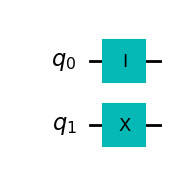

In [33]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)

circuit.i(0)
circuit.x(1)

circuit.draw("mpl")

In [35]:
psi.evolve(circuit).draw("latex")

<IPython.core.display.Latex object>

##  Quantum Circuit를 활용하여, entangle state (벨상태) $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle \right)$ 구현 및 측정

In [65]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q0 = QuantumRegister(1, "q0")
q1 = QuantumRegister(1, "q1")
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")

circuit = QuantumCircuit(q0,q1, c0, c1)
circuit.h(q0)
circuit.cx(q0, q1)

In [67]:
psi1 = Statevector([1 , 0])
psi2 = Statevector([1 , 0 ])

psi=psi2.tensor(psi1)
psi.evolve(circuit).draw("latex")

<IPython.core.display.Latex object>

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


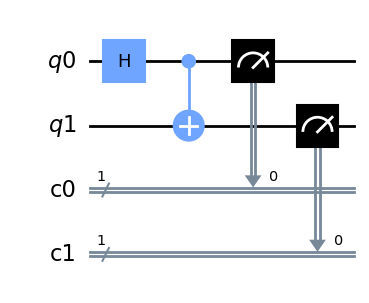

In [68]:
circuit.measure(q0, c0)
circuit.measure(q1, c1)

display(circuit.draw("mpl"))

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


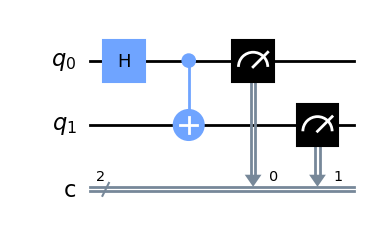

In [74]:
qreg_q= QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

display(circuit.draw("mpl"))

## 위 회로를 Sampler를 활용하여 측정을 예측

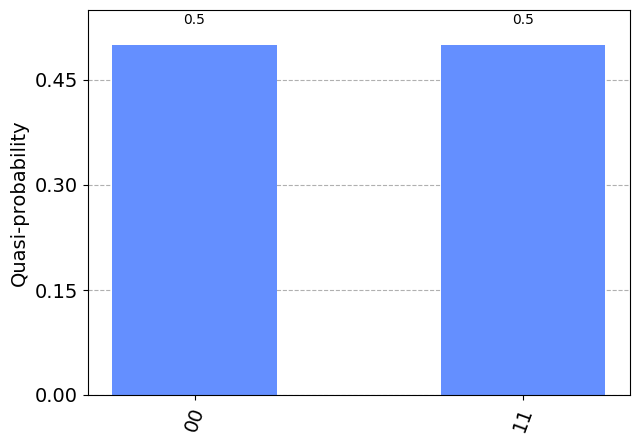

In [78]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

sampler = Sampler()
results = sampler.run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

## 위 회로를 IBM Quantum Computer simulator (Aersimulator)를 활용하여 실제 구현

In [47]:
!pip install qiskit-aer

output.clear()

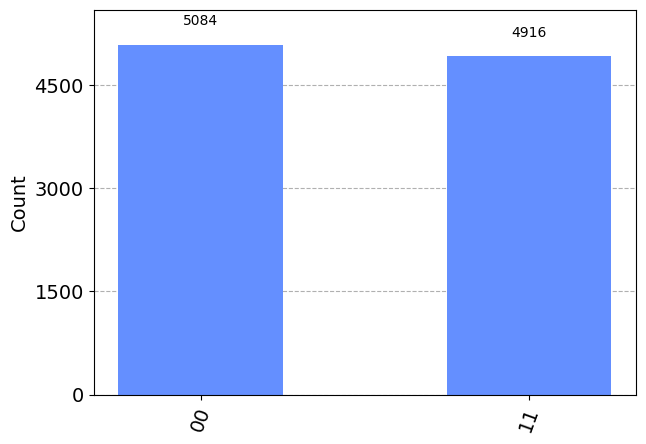

In [76]:
from qiskit_aer import AerSimulator

result = AerSimulator().run(circuit, shots=10000).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

# Homework

## Q1 학번과 이름을 출력하여라. (2점)

In [55]:
print("학번=         ", "이름 =        ")

학번=          이름 =        


### Q2 아래는 Quantum Circuit 을 활용하여 벨 상태 $|\Psi^-\rangle = \frac{1}{\sqrt{2}}\left(-|01\rangle + |10\rangle\right)$ 를 만드는 회로이다.  회로를 완성시키시오.

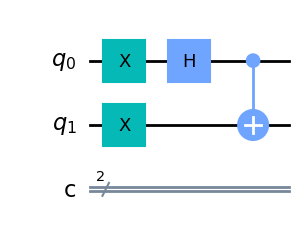

In [80]:
qreg_q= QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit = QuantumCircuit(qreg_q, creg_c)

### 중간 내용을 채울 것



###
display(circuit.draw("mpl"))

### Q3 : 위 회로를 $|00\rangle$ 에 적용하면, 상태가 $|\Psi^-\rangle$ 이 나오는지 결과로 확인하여라.

In [ ]:
psi1 = Statevector([1 , 0])
psi2 = Statevector([1 , 0 ])

psi=psi2.tensor(psi1)
psi.evolve(circuit).draw("latex")

### Q4 : Aersimulator를 사용하여, shots (반복)을 천번 (1,000) 실시하여, 결과값을 히스토그램으로 표현한다. 아래 코드를 완성하고 결과를 출력하여라.

In [ ]:
from qiskit_aer import AerSimulator

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

 # 아래 내용을 채울 것


display(plot_histogram(statistics))